# Case study on unsupervised learning
Wine Cluster Dataset - Try out different clustering models in the given dataset. Find the optimum
number of clusters in each model and create the model with optimum number of
clusters. Also learn about dB scan clustering and implement it

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the wine dataset
wine=pd.read_csv('/content/Wine_clust .csv')

Explore the dataset

In [3]:
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


no missing values in the dataset


In [5]:
wine.shape

(178, 13)

178 rows of data and 13 features

In [6]:
wine.describe()                                     # to view the statistics : notice the mean is varying across features we will have to standardize the data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
wine.skew()                                       # skewed distribution across features

Alcohol                -0.051482
Malic_Acid              1.039651
Ash                    -0.176699
Ash_Alcanity            0.213047
Magnesium               1.098191
Total_Phenols           0.086639
Flavanoids              0.025344
Nonflavanoid_Phenols    0.450151
Proanthocyanins         0.517137
Color_Intensity         0.868585
Hue                     0.021091
OD280                  -0.307285
Proline                 0.767822
dtype: float64

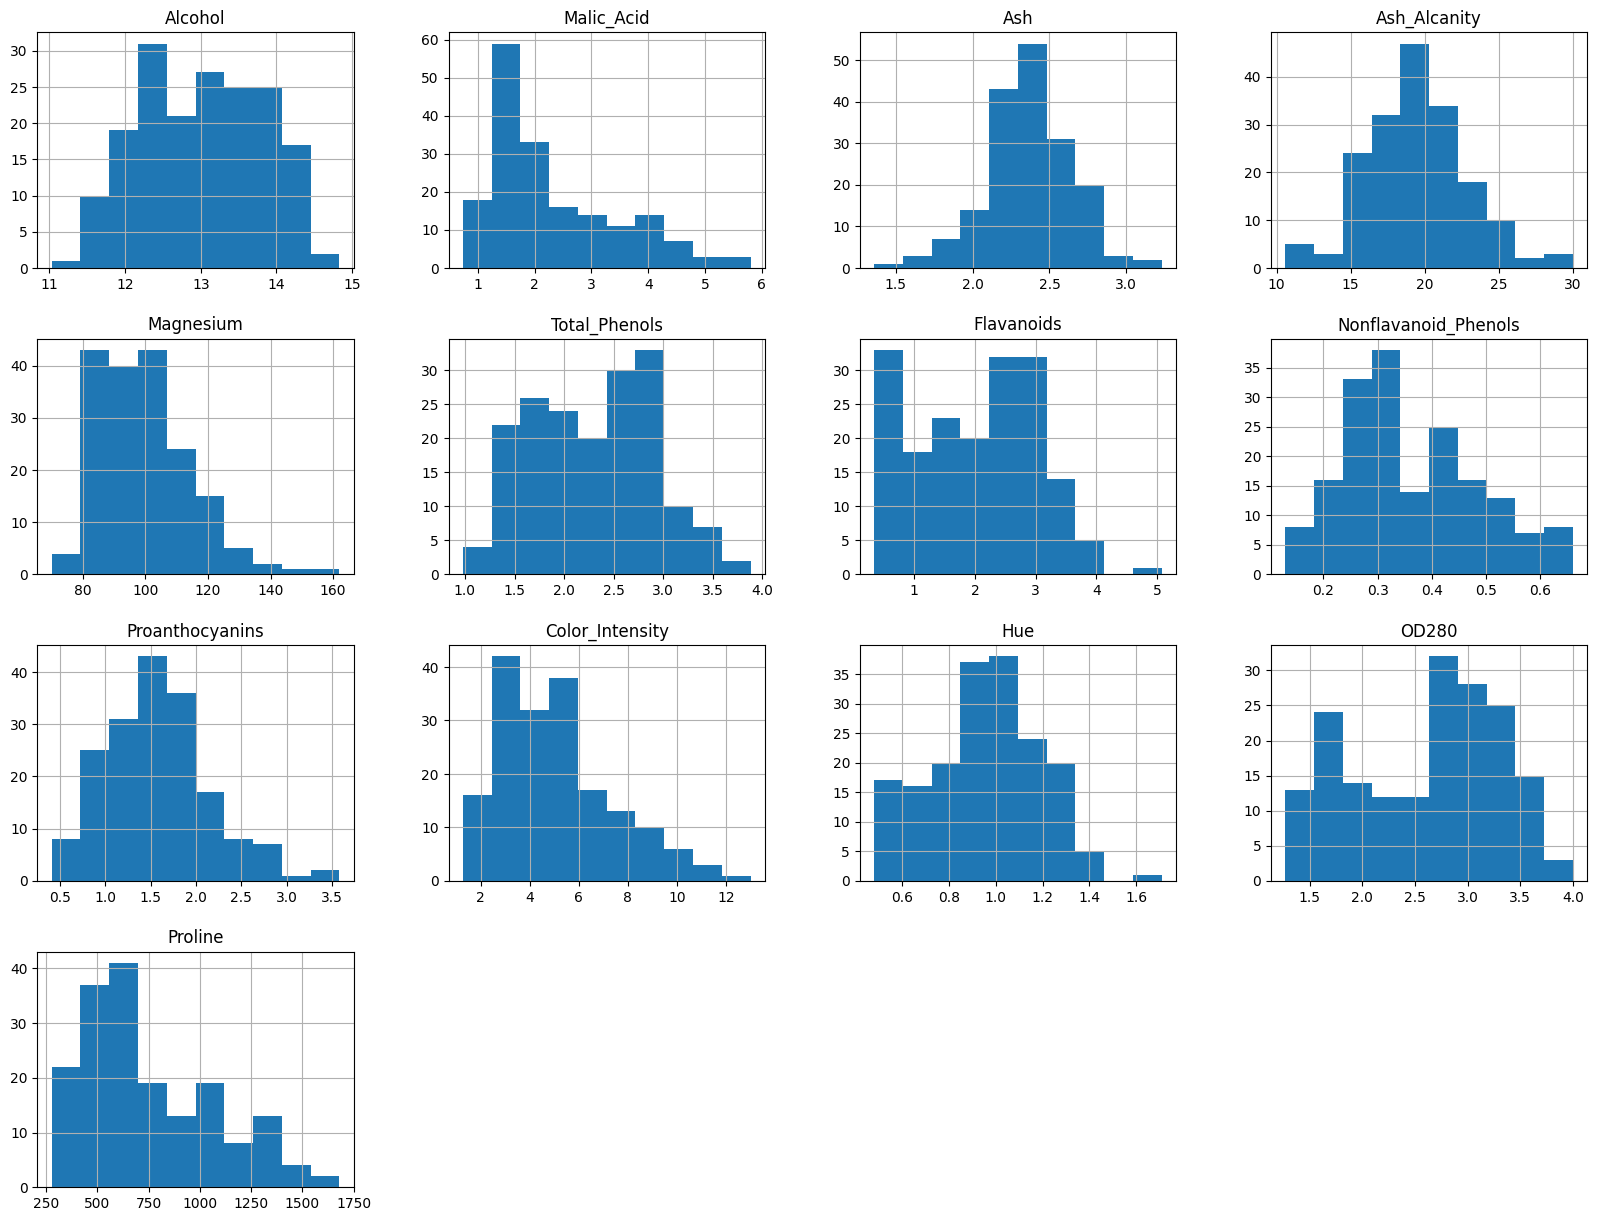

In [8]:
# plot histogram of dataset to visualize the distribution
wine.hist(figsize=(20,15))
plt.show
%matplotlib inline

all the features are highly skewed

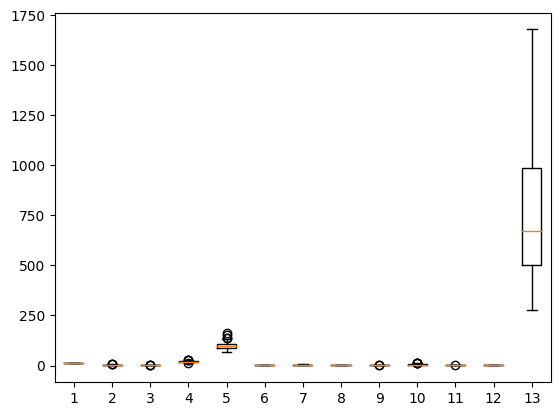

In [9]:
# using boxplot to check for any outliers
plt.boxplot(wine)
plt.show()

Since there are a few outliers, we will treat using IQR method

In [10]:
# to handle outliers
for j in wine:
    Q1=np.percentile(wine[j],25,method='midpoint')
    Q2=np.percentile(wine[j],50,method='midpoint')
    Q3=np.percentile(wine[j],75,method='midpoint')
    IQR = Q3-Q1
    low_lim = Q1-1.5*IQR
    up_lim = Q3+1.5*IQR
    outliers = []
    for h in wine[j]:
        if ((h < low_lim) | (h > up_lim)):
            outliers.append(h)
    wine[j]=wine[j].clip(lower=low_lim,upper=up_lim)

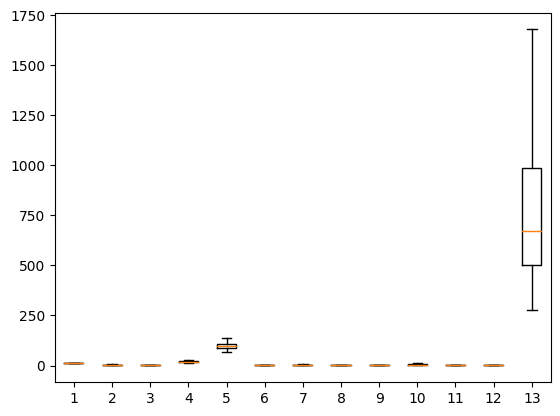

In [11]:
plt.boxplot(wine)                           # all outliers have been handled
plt.show()

Next - Normalized the data since the features are of varied ranges

In [14]:
from sklearn.preprocessing import normalize
wine_norm=normalize(wine)
wine_norm=pd.DataFrame(wine_norm,columns=wine.columns)

In [16]:
wine_norm.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753


In [17]:
wine_norm.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.019951,0.003698,0.003645,0.031103,0.151251,0.003444,0.002973,0.000581,0.002389,0.007311,0.001476,0.003994,0.986070
std,0.007321,0.002454,0.001403,0.014646,0.053976,0.001543,0.001802,0.000327,0.001233,0.003754,0.000732,0.001978,0.010062
min,0.008428,0.000944,0.001473,0.007739,0.064147,0.001255,0.000637,0.000145,0.000554,0.002241,0.000579,0.001675,0.951812
25%,0.013548,0.001684,0.002359,0.017615,0.109775,0.002385,0.001752,0.000277,0.001515,0.004612,0.000970,0.002535,0.981724
50%,0.018984,0.003174,0.003468,0.029883,0.146128,0.002946,0.002721,0.000514,0.002030,0.005981,0.001232,0.003384,0.988575
75%,0.024784,0.004981,0.004506,0.040010,0.183082,0.003886,0.003551,0.000833,0.003040,0.008853,0.001834,0.004870,0.993564
max,0.041106,0.013457,0.007305,0.069703,0.297958,0.008404,0.010560,0.002008,0.007469,0.021583,0.004727,0.010858,0.997835


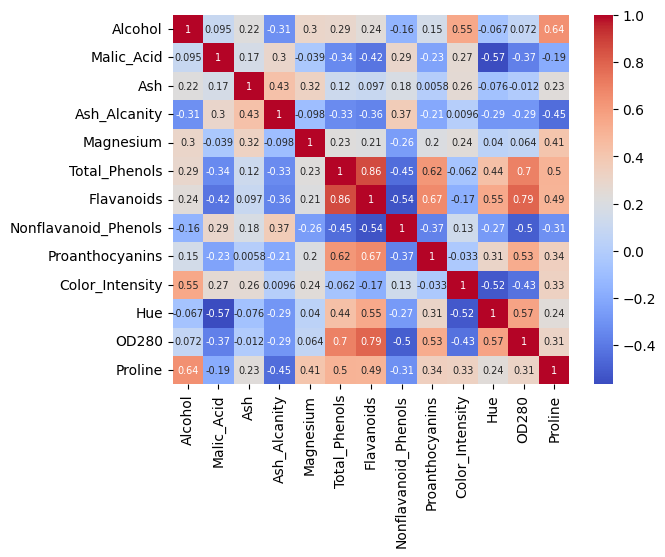

In [19]:
sns.heatmap(wine.corr(),annot=True,annot_kws={'size': 7},cmap='coolwarm')                                           # to view the correlation among the features
plt.show()

Many features are highly correlated in the dataset.

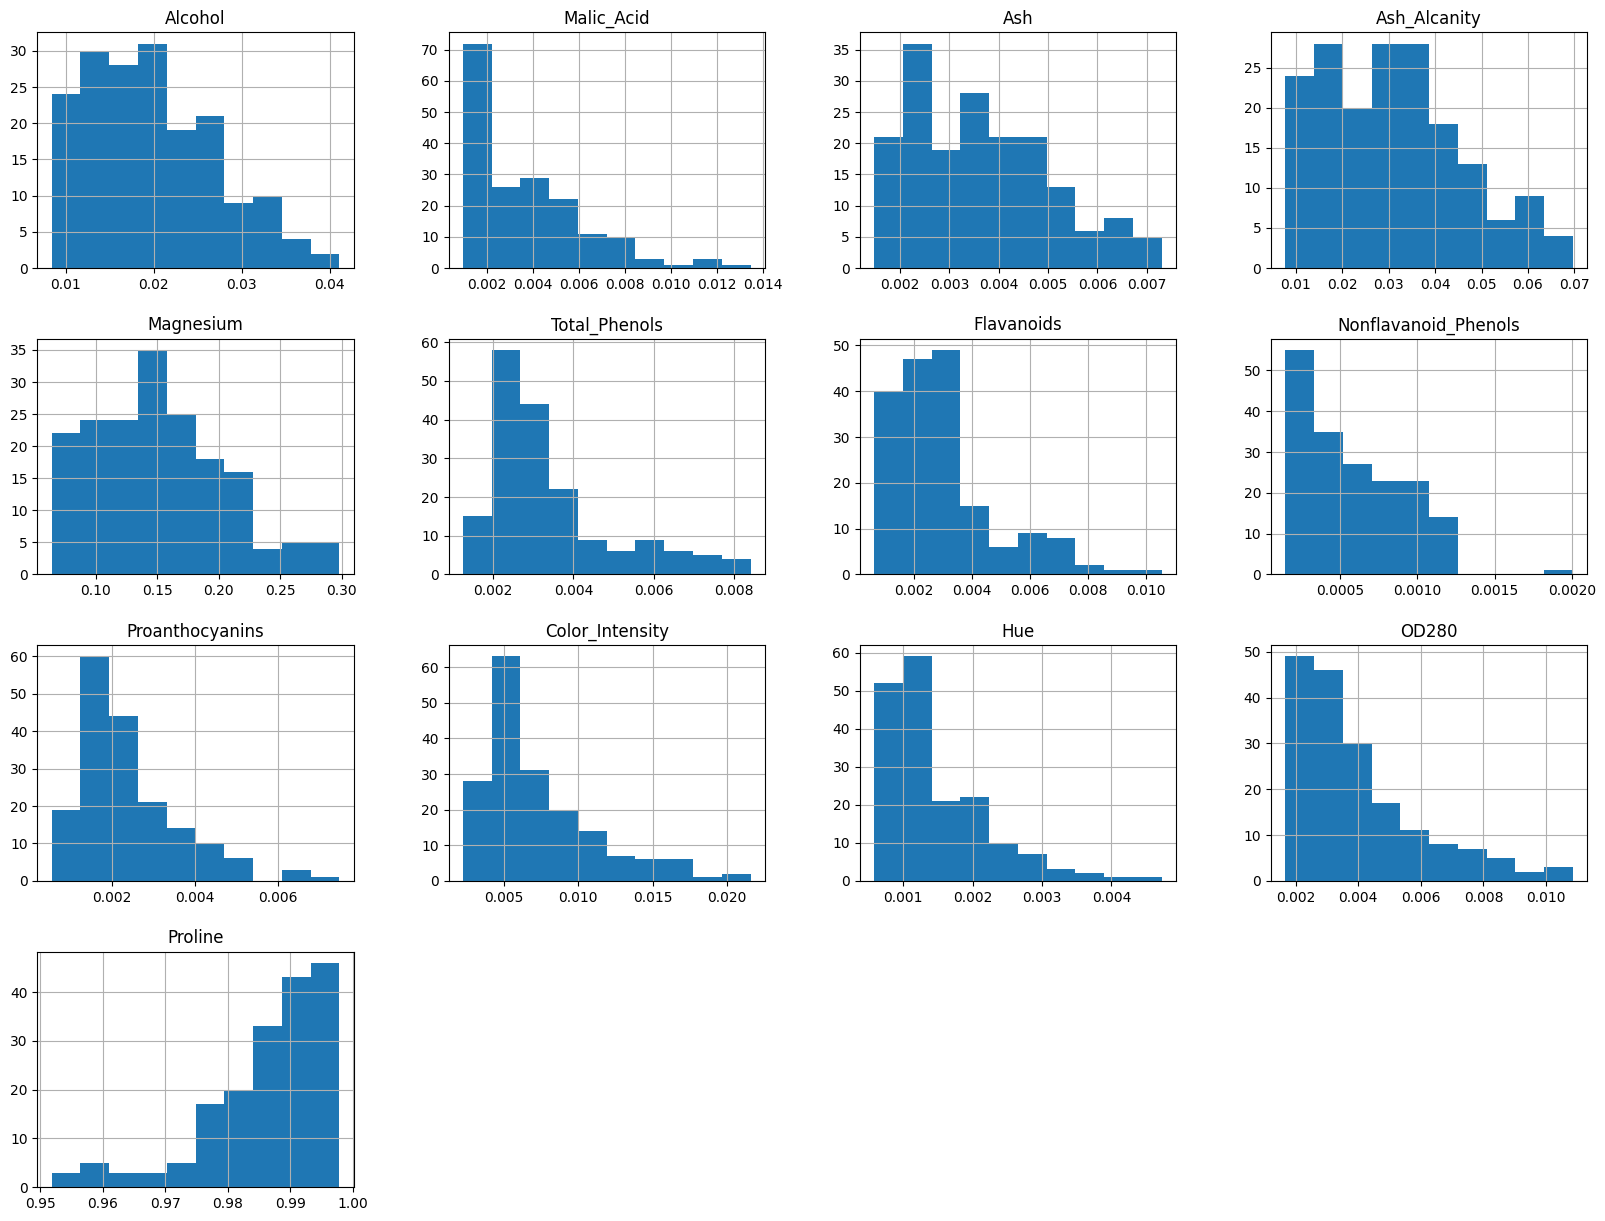

In [20]:
# to view the histogram of normalized data
wine_norm.hist(figsize=(20,15))
plt.show
%matplotlib inline

Distribution is still skewed

Data has been handled for outliers and values have been normalized. Will next perform clustering using all the features

# Clustering -using kMeans Method

In [21]:
# import Kmeans to perform clustering
from sklearn.cluster import KMeans

In [22]:
# using all features to try Kmeans clustering and assign to X
X=wine_norm.values

In [23]:
# within cluster sum of squares to find the number of clusters
wcss=[]
for i in range(1,12):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [24]:
wcss

[0.5870188036409472,
 0.20945581886716585,
 0.10213187265496282,
 0.05831284734208926,
 0.03908527241706081,
 0.030338371062652685,
 0.0257634976936974,
 0.022879464703622752,
 0.01966473501054173,
 0.017954954274401476,
 0.01659962762343005]

Text(0, 0.5, 'WCSS')

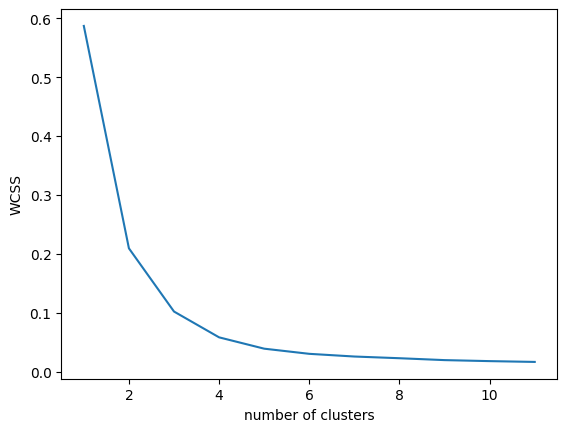

In [25]:
plt.plot(range(1,12),wcss)
plt.xlabel('number of clusters')
plt.ylabel('WCSS')

elbow method shows optimum number of clusters as 3 and could be 4 , but will choose 3 and try the clustering

In [26]:
# using 3 clusters to predict
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)

In [27]:
y_kmeans=kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
y_kmeans

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 2, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1,
       2, 2, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

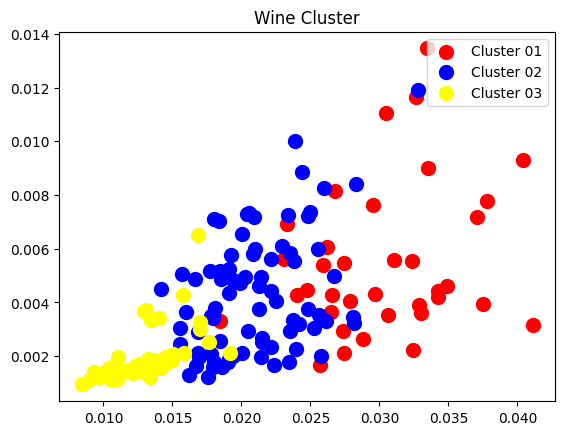

In [29]:
# using a scatter plot to visualize the clusters although we have taken all the features
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster 01')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster 02')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='yellow',label='Cluster 03')
plt.title('Wine Cluster')
plt.legend()
plt.show()

clustering seems ok as we have taken all the features of the dataset to plot

In [30]:
# using silhouette score to check for the accuracy in the clustering
from sklearn.metrics import silhouette_score
silhouette_score_avg=silhouette_score(X,y_kmeans)
silhouette_score_avg

0.5245690977066271

using kMeans clustering the model score of 0.524 suggests the number of clusters chosen seems relevant and that the wine dataset forms 3 clusters

# Agglomerative HC - using dendrogram

Redefining the features to a new variable

In [31]:
Z=wine_norm.values

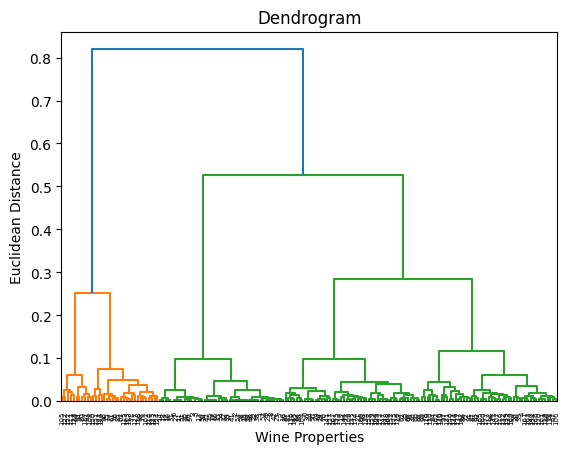

In [32]:
# import the library for dendrogram -
import scipy.cluster.hierarchy as sch
dend=sch.dendrogram(sch.linkage(Z,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Wine Properties')
plt.ylabel('Euclidean Distance')
plt.show()

dendrogram shows optimum number of clusters that cuts across the largest euclidean distance as 3

In [33]:
# clustering with 3 clusters
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
y_hc=hc.fit_predict(Z)

In [34]:
y_hc

array([0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

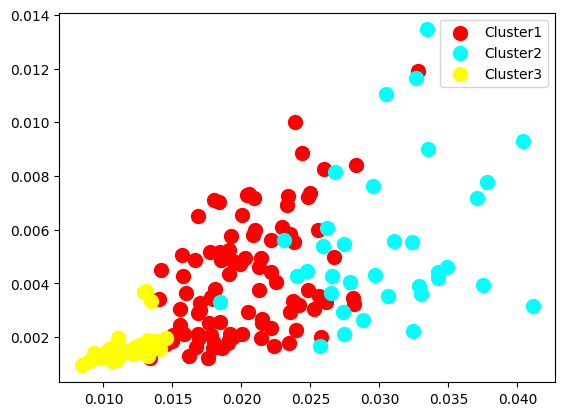

In [35]:
plt.scatter(Z[y_hc==0,0],Z[y_hc==0,1],s=100,c='red',label='Cluster1')
plt.scatter(Z[y_hc==1,0],Z[y_hc==1,1],s=100,c='cyan',label='Cluster2')
plt.scatter(Z[y_hc==2,0],Z[y_hc==2,1],s=100,c='yellow',label='Cluster3')
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import silhouette_score
sil=silhouette_score(Z,y_hc)
print(sil)

0.5055651930099017


using dendrogram and optimum number of clusters as 3, silhouette score of 0.5055 also shows the model is somewhat accurate in clustering

# Using Density Based Spatial Clustering of Applications - DBScan method

Inorder to use DBSCAN , will use the original dataset without handling the outliers

In [37]:
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


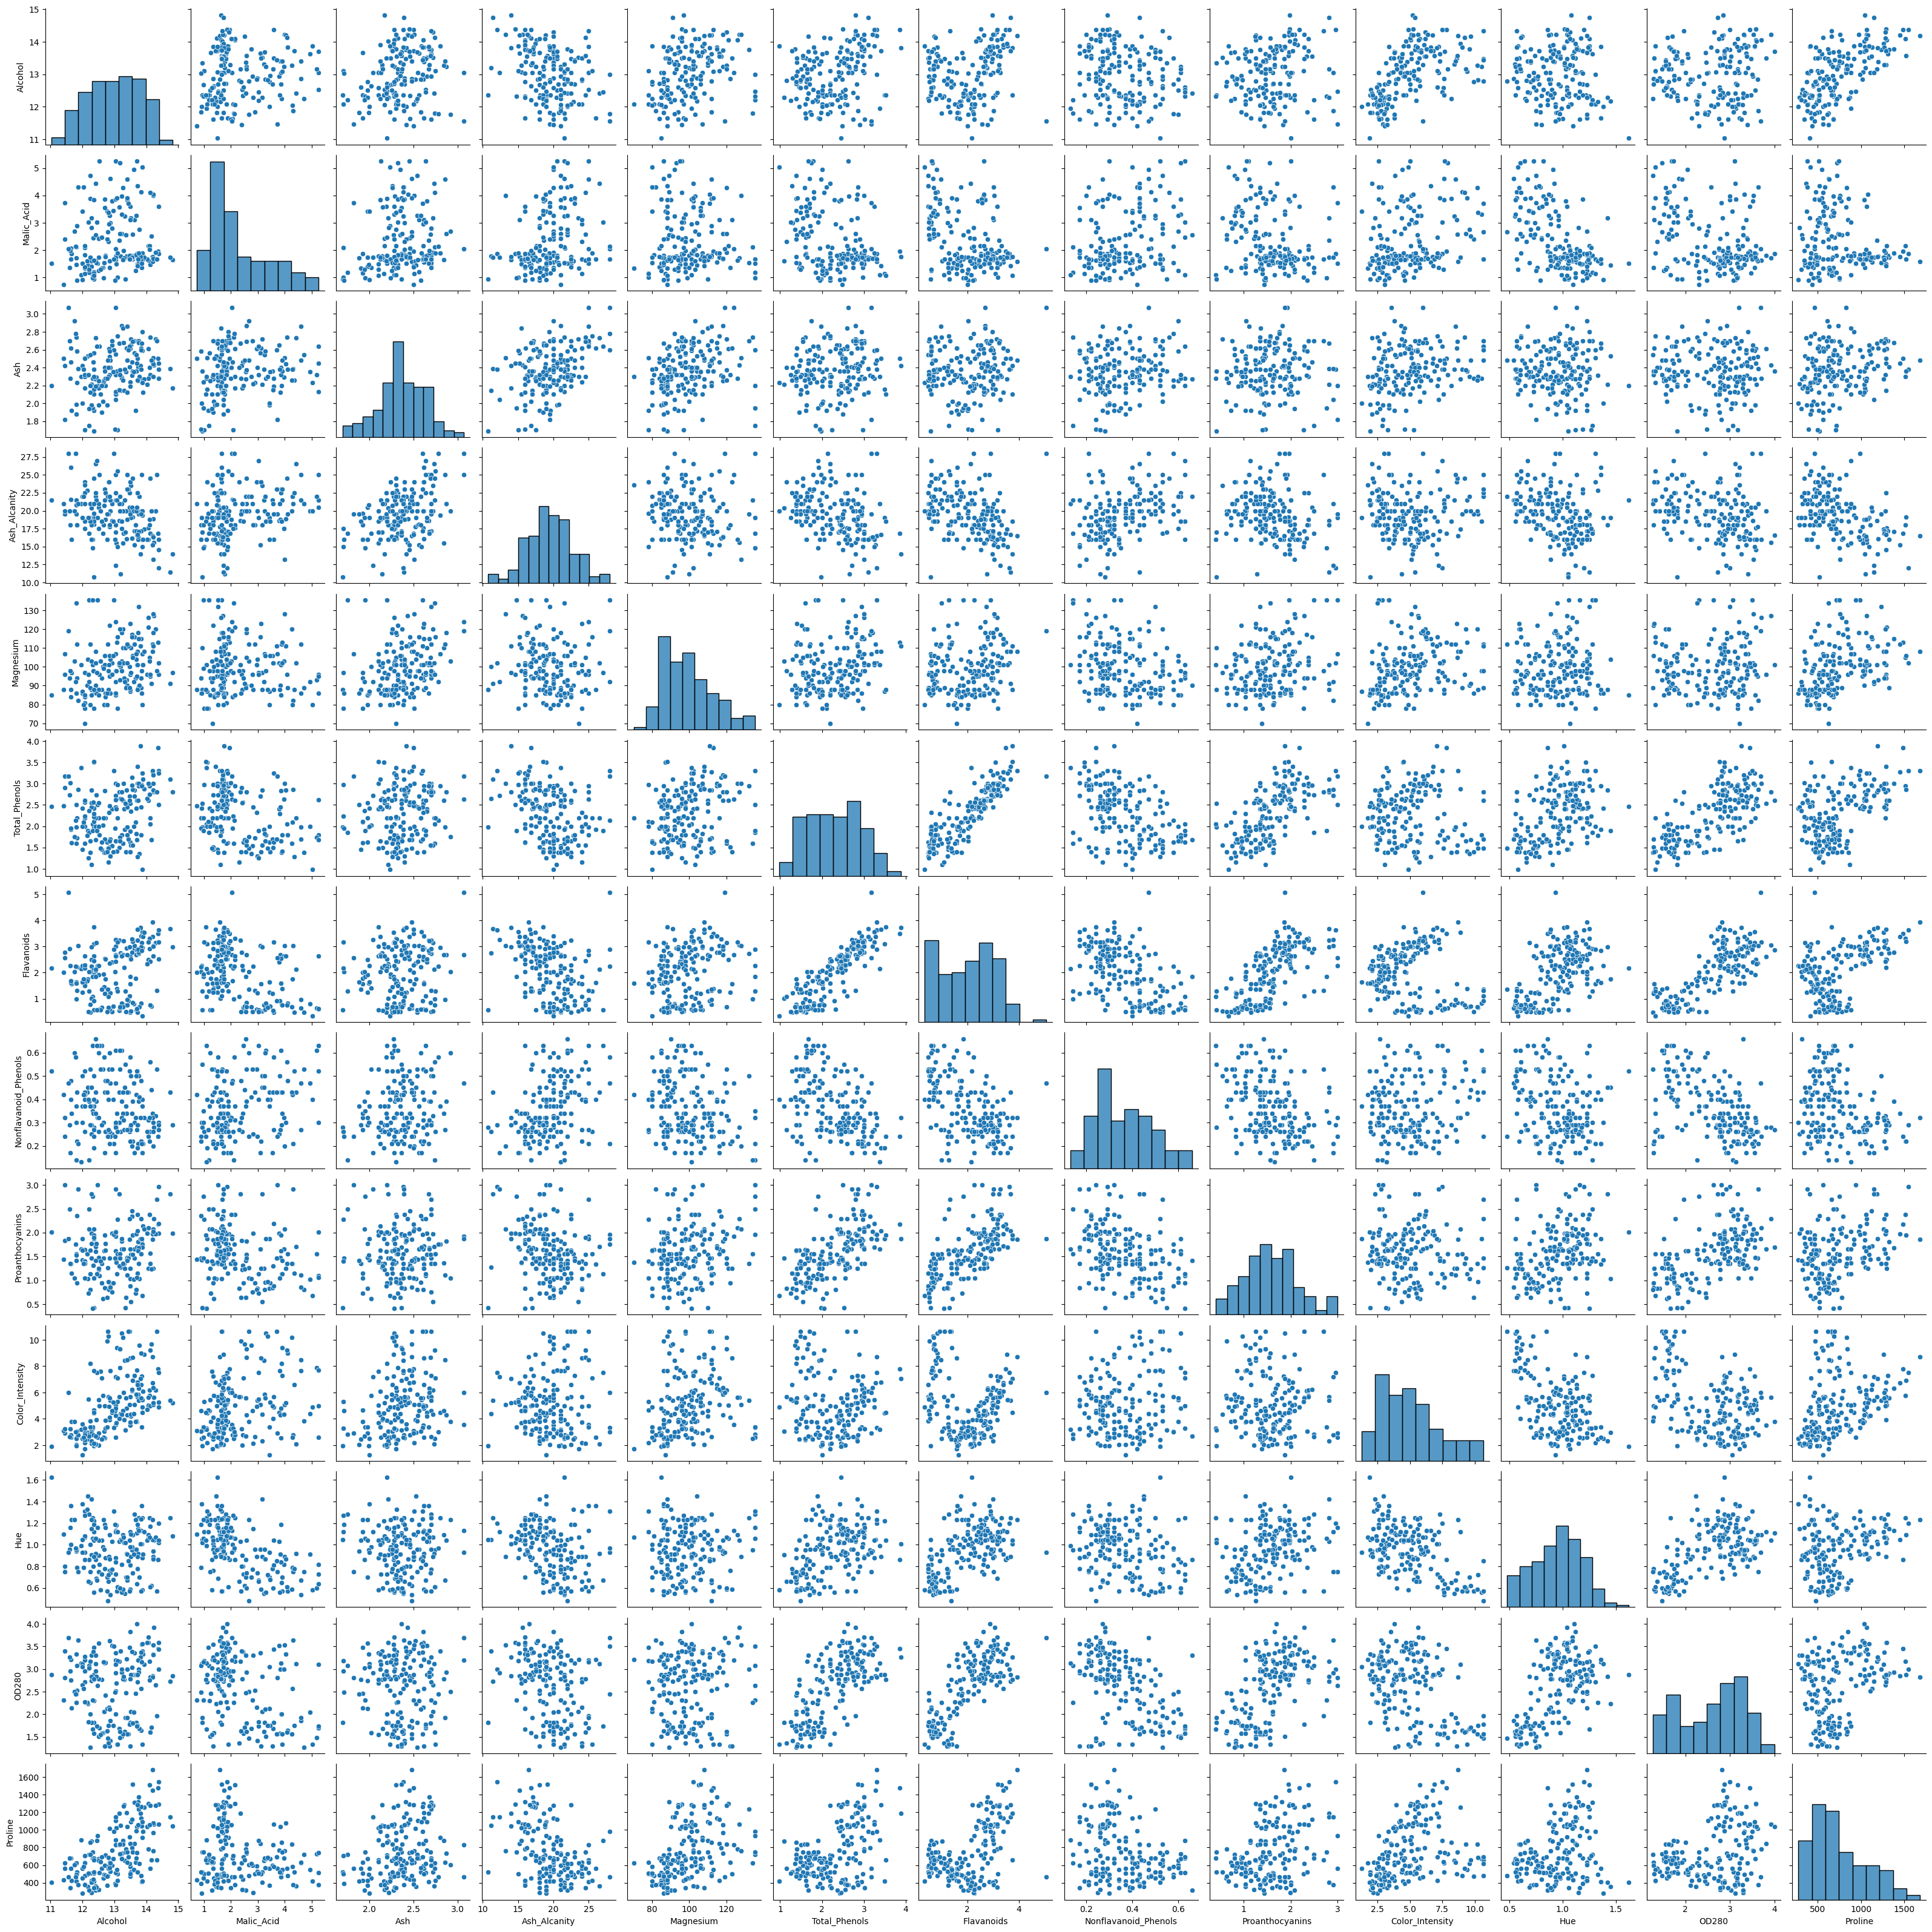

In [38]:
sns.pairplot(wine)
plt.show()

Data points are scattered and hence DBSCAN will help in clustering and segregating noise from the clusters

Using Standard Scaler or MinMax Scaler makes data sensitive to outliers and hence using Robust Scaler to scale the data

In [43]:
# using Robust Scaler to scale the data before DBSCAN
from sklearn.preprocessing import RobustScaler
scale=RobustScaler()
wine_scale=pd.DataFrame(scale.fit_transform(wine),columns=wine.columns)

In [45]:
wine_scale.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.897338,-0.104730,0.201439,-0.906977,1.526316,0.420804,0.553892,-0.358209,1.050000,0.318792,0.222222,0.924949,0.808050
1,0.114068,-0.057432,-0.633094,-1.930233,0.105263,0.278960,0.374251,-0.477612,-0.392857,-0.104027,0.251852,0.503043,0.777090
2,0.083650,0.334459,0.892086,-0.209302,0.157895,0.420804,0.661677,-0.238806,1.792857,0.332215,0.192593,0.316430,1.055728
3,1.003802,0.057432,0.402878,-0.627907,0.789474,1.413712,0.811377,-0.597015,0.892857,1.043624,-0.311111,0.543611,1.664603
4,0.144487,0.489865,1.467626,0.348837,1.052632,0.420804,0.332335,0.298507,0.378571,-0.124161,0.222222,0.121704,0.126935


In [108]:
X=wine_scale.iloc[:,[5,6]]    # chose 2 features Total_Phenols and Flavanoids as they are highly correlated

In [109]:
X.head()

,Total_Phenols,Flavanoids
0,0.420804,0.553892
1,0.278960,0.374251
2,0.420804,0.661677
3,1.413712,0.811377
4,0.420804,0.332335


DBSCAN clustering for 2 features assigned to scaled data X

In [116]:
# apply DBSCAN and generate labels
from sklearn.cluster import DBSCAN
dbs=DBSCAN(eps=0.2,min_samples=14)
dbs.fit(X)
labels=dbs.labels_
print(np.unique(labels))
dbs

[-1  0  1  2]


DBSCAN(eps=0.2, min_samples=14)

In [112]:
wine['dbs_labels']=labels

In [113]:
wine['dbs_labels'].value_counts()

dbs_labels
 0    76
-1    51
 2    37
 1    14
Name: count, dtype: int64

This shows that the features are segregated into 4 labels: 0,1,2 correspond to **3 clusters** and -1 corresponds to **noise** ie.outliers

In [114]:
wine

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,dbs_labels
0,14.23,1.710,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.780,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.360,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.950,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,-1
4,13.24,2.590,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.255,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.910,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.280,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.590,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [123]:
from sklearn import metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)

Silhouette Coefficient:0.25


In [124]:
from sklearn.metrics import silhouette_score
sil=silhouette_score(X,labels)
print(sil)

0.24641215527138927


Through Analysis , kMeans Clustering and Agglomerative HC showed there are 3 clusters when all features were used in the model. Silhouette Score of 0.524 and 0.505 respectively.

DBSCAN showed 3 clusters when 2 features were used in the model. Silhouette score of 0.25